# Example output featured in RAMP's publication in JOSS

The code in this notebook showcases how to produce a typical RAMP visual output. The same output is used as an illustrative figure in RAMP's publication in JOSS.

### Step 1. Importing some of the user types available from the Example Input File 1

In [1]:
from ramp import UseCase
from ramp.example.input_file_1 import LMI, LI

LMI.num_users = 2
LI.num_users = 1

### Step 2. Creating a UseCase and generating a list of load profiles

In [2]:
uc = UseCase("JOSS-paper-figure", users=[LMI, LI], random_seed=20240110)
uc.initialize(num_days=1)

profiles = uc.generate_daily_load_profiles(cases=[1, 2, 3, 4, 5])

You will simulate 1 day(s) from 2024-05-15 00:00:00 until 2024-05-16 00:00:00


### Step 3. Post-processing and plotting

Text(0.5, 0, 'Time (hours:minutes)')

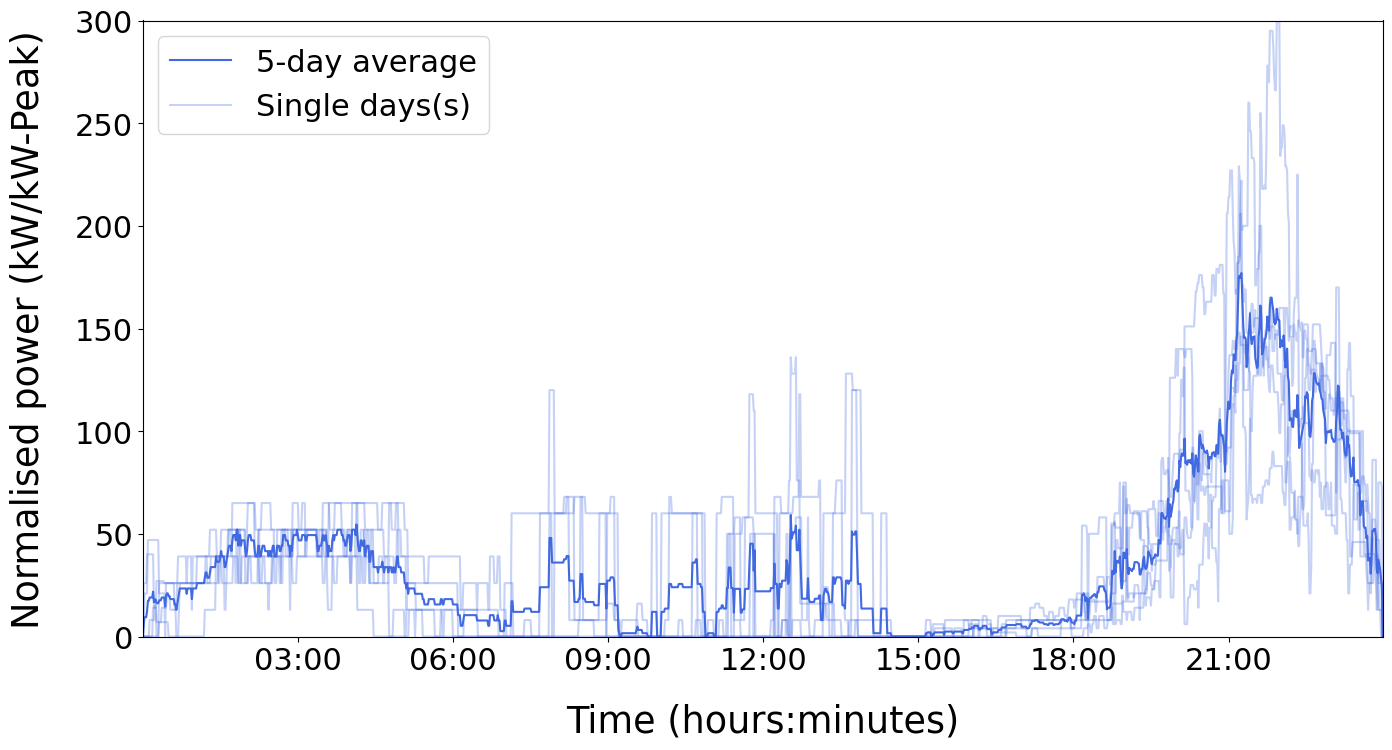

In [3]:
# Creating a custom plot function based on the in-built 'plot.shadow()' functionality
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams.update({"font.size": 22})

fig, ax1 = profiles.shadow(figsize=(16, 8))
for ln in range(0, len(profiles.columns) + 1):
    ax1.get_lines()[ln].set_color(
        "royalblue"
    )  # edits the defualt colour of the shadow-plot lines
ax1.legend(["5-day average", "Single days(s)"])
ax1.margins(0)

ax1.set_xticks(ax1.get_xticks()[1:])

myFmt = mdates.DateFormatter("%H:%M")
ax1.xaxis.set_major_formatter(myFmt)

ax1.set_ylabel("Normalised power (kW/kW-Peak)", fontsize="large", labelpad=20)
ax1.set_xlabel("Time (hours:minutes)", fontsize="large", labelpad=20)